<a href="https://colab.research.google.com/github/fabiansep/TalentOps/blob/main/m2_e4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Crear dataset de rendimiento estudiantil
np.random.seed(42)
n_estudiantes = 500

df = pd.DataFrame({
    'id_estudiante': range(1, n_estudiantes + 1),
    'edad': np.random.normal(16, 1.5, n_estudiantes).clip(14, 19).astype(int),
    'horas_estudio_semanal': np.random.normal(20, 8, n_estudiantes).clip(5, 50).astype(int),
    'promedio_calificaciones': np.random.normal(7.5, 1.2, n_estudiantes).clip(1, 10),
    'ingresos_familiares': np.random.lognormal(9, 0.6, n_estudiantes).round(0),
    'nivel_socioeconomico': np.random.choice(['Bajo', 'Medio', 'Alto'], n_estudiantes, p=[0.3, 0.5, 0.2]),
    'asistencia_clases': np.random.normal(85, 15, n_estudiantes).clip(10, 100).astype(int),
    'horas_extracurriculares': np.random.normal(8, 4, n_estudiantes).clip(0, 20).astype(int),
    'satisfaccion_vida': np.random.normal(7.2, 1.5, n_estudiantes).clip(1, 10),
    'nivel_estres': np.random.normal(6.8, 1.8, n_estudiantes).clip(1, 10)
})

# Convertir variables categóricas
nivel_map = {'Bajo': 1, 'Medio': 2, 'Alto': 3}
df['nivel_socioeconomico_num'] = df['nivel_socioeconomico'].map(nivel_map)

print(f"Dataset creado: {len(df)} estudiantes")
print(f"Variables numéricas: {len(df.select_dtypes(include=[np.number]).columns)}")

Dataset creado: 500 estudiantes
Variables numéricas: 10


In [3]:
correlaciones_calificaciones = df.corr(numeric_only=True)['promedio_calificaciones'].sort_values(ascending=False)

print("CORRELACIONES CON PROMEDIO DE CALIFICACIONES")
print("=" * 50)
for var, corr in correlaciones_calificaciones.items():
    if var != 'promedio_calificaciones':
        intensidad = "Fuerte" if abs(corr) > 0.6 else "Moderada" if abs(corr) > 0.3 else "Débil"
        direccion = "positiva" if corr > 0 else "negativa"
        print(f"{var:25} | {corr:+.3f} | {intensidad} {direccion}")

CORRELACIONES CON PROMEDIO DE CALIFICACIONES
horas_estudio_semanal     | +0.076 | Débil positiva
nivel_socioeconomico_num  | +0.060 | Débil positiva
satisfaccion_vida         | +0.009 | Débil positiva
id_estudiante             | -0.000 | Débil negativa
nivel_estres              | -0.014 | Débil negativa
asistencia_clases         | -0.031 | Débil negativa
ingresos_familiares       | -0.034 | Débil negativa
horas_extracurriculares   | -0.038 | Débil negativa
edad                      | -0.065 | Débil negativa


In [4]:
# Variables numéricas principales
variables_interes = ['edad', 'horas_estudio_semanal', 'promedio_calificaciones',
                    'ingresos_familiares', 'asistencia_clases', 'horas_extracurriculares',
                    'satisfaccion_vida', 'nivel_estres', 'nivel_socioeconomico_num']

correlation_matrix = df[variables_interes].corr()

print("\nMATRIZ DE CORRELACIÓN")
print("=" * 25)
# Mostrar correlaciones > 0.3 en valor absoluto
strong_correlations = correlation_matrix.where(abs(correlation_matrix) > 0.3)
print(strong_correlations.round(3))


MATRIZ DE CORRELACIÓN
                          edad  horas_estudio_semanal  \
edad                       1.0                    NaN   
horas_estudio_semanal      NaN                    1.0   
promedio_calificaciones    NaN                    NaN   
ingresos_familiares        NaN                    NaN   
asistencia_clases          NaN                    NaN   
horas_extracurriculares    NaN                    NaN   
satisfaccion_vida          NaN                    NaN   
nivel_estres               NaN                    NaN   
nivel_socioeconomico_num   NaN                    NaN   

                          promedio_calificaciones  ingresos_familiares  \
edad                                          NaN                  NaN   
horas_estudio_semanal                         NaN                  NaN   
promedio_calificaciones                       1.0                  NaN   
ingresos_familiares                           NaN                  1.0   
asistencia_clases                   

In [5]:
# Encontrar pares con correlaciones más fuertes
corr_unstack = correlation_matrix.unstack()
corr_unstack = corr_unstack[corr_unstack.index.get_level_values(0) != corr_unstack.index.get_level_values(1)]

top_correlations = corr_unstack.abs().sort_values(ascending=False).head(10)

print("\nTOP 10 CORRELACIONES MÁS FUERTES")
print("=" * 35)
for (var1, var2), corr_abs in top_correlations.items():
    if var1 < var2:  # Evitar duplicados
        corr_real = correlation_matrix.loc[var1, var2]
        print(f"{var1:20} ↔ {var2:20} | {corr_real:+.3f}")


TOP 10 CORRELACIONES MÁS FUERTES
asistencia_clases    ↔ horas_extracurriculares | -0.117
horas_estudio_semanal ↔ satisfaccion_vida    | -0.103
edad                 ↔ horas_estudio_semanal | -0.093
asistencia_clases    ↔ horas_estudio_semanal | -0.087
horas_estudio_semanal ↔ nivel_estres         | -0.079


In [6]:
# Identificar clusters de variables relacionadas
print("\nANÁLISIS DE GRUPOS CORRELACIONADOS")
print("=" * 40)

# Variables relacionadas con rendimiento académico
academic_vars = ['horas_estudio_semanal', 'asistencia_clases', 'promedio_calificaciones']
academic_corr = df[academic_vars].corr()
print("Variables académicas:")
print(academic_corr.round(3))

# Variables relacionadas con bienestar
wellbeing_vars = ['satisfaccion_vida', 'nivel_estres', 'horas_extracurriculares']
wellbeing_corr = df[wellbeing_vars].corr()
print("\nVariables de bienestar:")
print(wellbeing_corr.round(3))

# Variables socioeconómicas
socio_vars = ['ingresos_familiares', 'nivel_socioeconomico_num', 'promedio_calificaciones']
socio_corr = df[socio_vars].corr()
print("\nVariables socioeconómicas:")
print(socio_corr.round(3))


ANÁLISIS DE GRUPOS CORRELACIONADOS
Variables académicas:
                         horas_estudio_semanal  asistencia_clases  \
horas_estudio_semanal                    1.000             -0.087   
asistencia_clases                       -0.087              1.000   
promedio_calificaciones                  0.076             -0.031   

                         promedio_calificaciones  
horas_estudio_semanal                      0.076  
asistencia_clases                         -0.031  
promedio_calificaciones                    1.000  

Variables de bienestar:
                         satisfaccion_vida  nivel_estres  \
satisfaccion_vida                    1.000         0.072   
nivel_estres                         0.072         1.000   
horas_extracurriculares             -0.033        -0.011   

                         horas_extracurriculares  
satisfaccion_vida                         -0.033  
nivel_estres                              -0.011  
horas_extracurriculares                   


Mapa de calor guardado como 'matriz_correlacion_estudiantil.png'


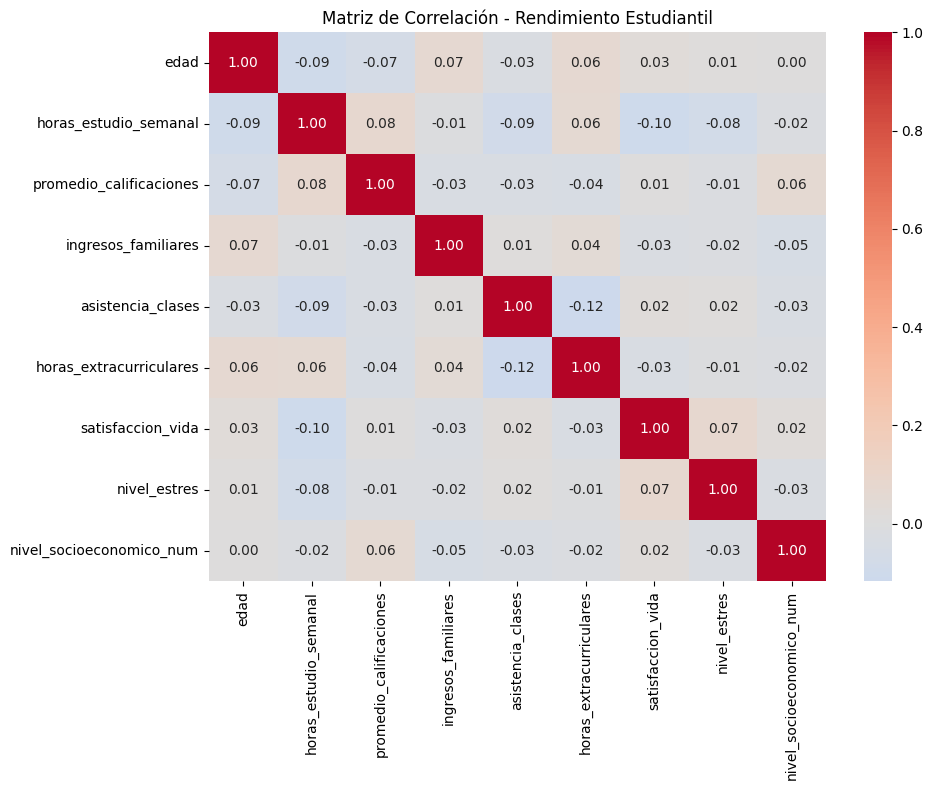

In [7]:
try:
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Matriz de Correlación - Rendimiento Estudiantil')
    plt.tight_layout()
    plt.savefig('matriz_correlacion_estudiantil.png', dpi=100, bbox_inches='tight')
    print("\nMapa de calor guardado como 'matriz_correlacion_estudiantil.png'")

except ImportError:
    print("\nMatplotlib/Seaborn no disponibles - omitiendo visualización")